In [26]:
!pip install pycountry
!pip install pycountry-convert
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import pycountry_convert as pcc
import numpy
!python3 -m pip install lxml
from bs4 import BeautifulSoup
import requests as rq
import numpy as np
import seaborn as sns
!pip install geopandas
import geopandas
!pip install descartes
import descartes

In [2]:
df_trade = pd.read_excel("GTA_all_data.xlsx")
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaN,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain


In [3]:
df_trade['Inception Date'] =  pd.to_datetime(df_trade['Inception Date'])
df_trade['Announcement Date'] =  pd.to_datetime(df_trade['Announcement Date'])
df_trade['Removal Date'] =  pd.to_datetime(df_trade['Removal Date'])

df_trade.columns = ['State Act ID', 'Intervention ID', 'State Act Title',
       'Announcement Date', 'GTA_Evaluation', 'Currently in force',
       'Inception Date', 'Removal Date', 'Implementing Jurisdiction',
       'Intervention Type', 'MAST chapter', 'Affected Sectors',
       'Affected Products', 'Affected Jurisdiction']

In [5]:
df_trade["announcement_year"] = df_trade["Announcement Date"].dt.strftime("%Y")

In [6]:
df_trade["announcement_year"] =  pd.to_numeric(df_trade["announcement_year"])
year_tmes_df = df_trade.groupby("announcement_year")["Trade Measure Type"].value_counts().to_frame()


In [8]:
df_trade["Implementing Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines"}, 
                                              inplace=True)

df_trade["Affected Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis", "U.S.": "United States of America",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines",}, 
                                              inplace=True)



In [9]:
df_trade['impl_continent'] = df_trade["Implementing Jurisdiction"].apply(lambda x: 
                                            pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))



In [45]:
r = rq.get('https://www.globaltradealert.org/sectors')
bisque = BeautifulSoup(r.text, 'html.parser')
crabby = bisque.prettify()
sector_lists = bisque.find("ul", class_="list-unstyled sector_search")
bisque.find("ul", class_="list-unstyled sector_search")

sector_li = sector_lists.find_all("li")
sector_li

sectorIDs = []
sectorNames = []

for i in range(0, 329):
    sectorIDs.append(sector_li[i]['id'][7:])
    sectorNames.append(sector_li[i]['name'])
    
sector_df = pd.DataFrame({'sectorID': sectorIDs, 'sector': sectorNames})
sector_df 

,sectorID,sector
0,011,cereals
1,012,vegetables
2,013,fruits and nuts
3,014,oilseeds and oleaginous fruits
4,015,edible roots and tubers with high starch or in...
...,...,...
324,972,beauty and physical well-being services
325,973,"funeral, cremation and undertaking services"
326,979,other miscellaneous services
327,980,domestic services


In [48]:
sector_string_list = sector_df['sectorID'].apply(make_string).to_list()

In [46]:
df_trade['sector_string'] = df_trade['Affected Sectors']
def make_string(x):
    if type(x) is not str:
        return str(x)
    else:
        return x
        
        
    
df_trade["sector_string"] = df_trade["sector_string"].apply(make_string)
df_trade['sector_list'] = df_trade['sector_string'].str.split(",")
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA_Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,...,Affected Sectors,Affected Products,Affected Jurisdiction,mask,Trade Measure Type,announcement_year,impl_continent,Intervention_ID,sector_string,sector_list
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,333,"271012, 271019",France,True,Tariff,2008,AF,17542,333,[333]
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,333,"271012, 271019",United Arab Emirates,True,Tariff,2008,AF,17542,333,[333]
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,333,271019,United Kingdom,True,Tariff,2008,AF,17542,333,[333]
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,...,333,"271012, 271019",Portugal,True,Tariff,2008,AF,17542,333,[333]
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,False,Non-Tariff,2009,SA,20128,"429, 439, 441, 476, 479, 381","[429, 439, 441, 476, 479, 381]"


In [49]:
for sector in sector_string_list:
    df_trade[sector] = df_trade['sector_string'].str.contains(pat=sector)

In [50]:
sector_sums = []
for sector in sector_string_list:
    sector_sums.append(df_trade[sector].sum())
    
sector_df['measure_count'] = sector_sums

sector_df['proportion_of_sectors'] = sector_df['measure_count'] / sector_df['measure_count'].sum()

# Heatmaps

In [10]:
g20_list_new = ['Australia', 'India', 'United Kingdom','France', 'Canada', 'Japan', 
                'Mexico', 'Brazil', 'Italy', 'Germany', 'Indonesia', 'China', 'Argentina', 'Russia',
                'United States of America', 'South Africa', 'Saudi Arabia', 'Korea, Republic of', 'Turkey', 'European Union']

g20_EU = g20_list_new.copy()

just_eu = ['Malta', 'Lithuania', 'Slovenia', 'Austria','Finland', 'Netherlands', 'Romania', 'Hungary', 'Slovakia',
           'Sweden', 'Czechia','Belgium', 'Latvia', 'Poland', 'Croatia', 'Greece', 'Denmark', 
           'Bulgaria', 'Estonia', 'Portugal','Cyprus']

g20_EU.extend(just_eu)

In [52]:
gDF = df_trade[df_trade['Implementing Jurisdiction'].isin(g20_EU) & 
                     df_trade['Affected Jurisdiction'].isin(g20_EU)]

In [53]:
matrix_df = pd.DataFrame(index=g20_list_new, columns=g20_list_new)
matrix_df = matrix_df.fillna(0)

In [54]:
gDF = gDF.replace(just_eu, "European Union")

In [55]:
def get_perp(impl, affd, in_df):
    temp_df = in_df[(in_df['Implementing Jurisdiction'] == impl) & (in_df['Affected Jurisdiction'] == affd)]
    temp_df['Intervention_ID'] = temp_df['Intervention ID'] 
    gr_df = temp_df[temp_df['GTA_Evaluation'] == "Green"]
    temp = np.nan
    if (len(gr_df) > 0) and (len(temp_df) > 0):
        percent_green = pd.DataFrame(gr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count() / temp_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count())
        percent_green['percent_red'] = 1 - percent_green['Intervention_ID']
        temp = percent_green.loc[impl]['percent_red']
    return temp

## All years heatmap

In [15]:
for i in g20_list_new:
    for j in g20_list_new:
        if i != j:
            matrix_df.loc[i, j] = round(get_perp(i, j, gDF),2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


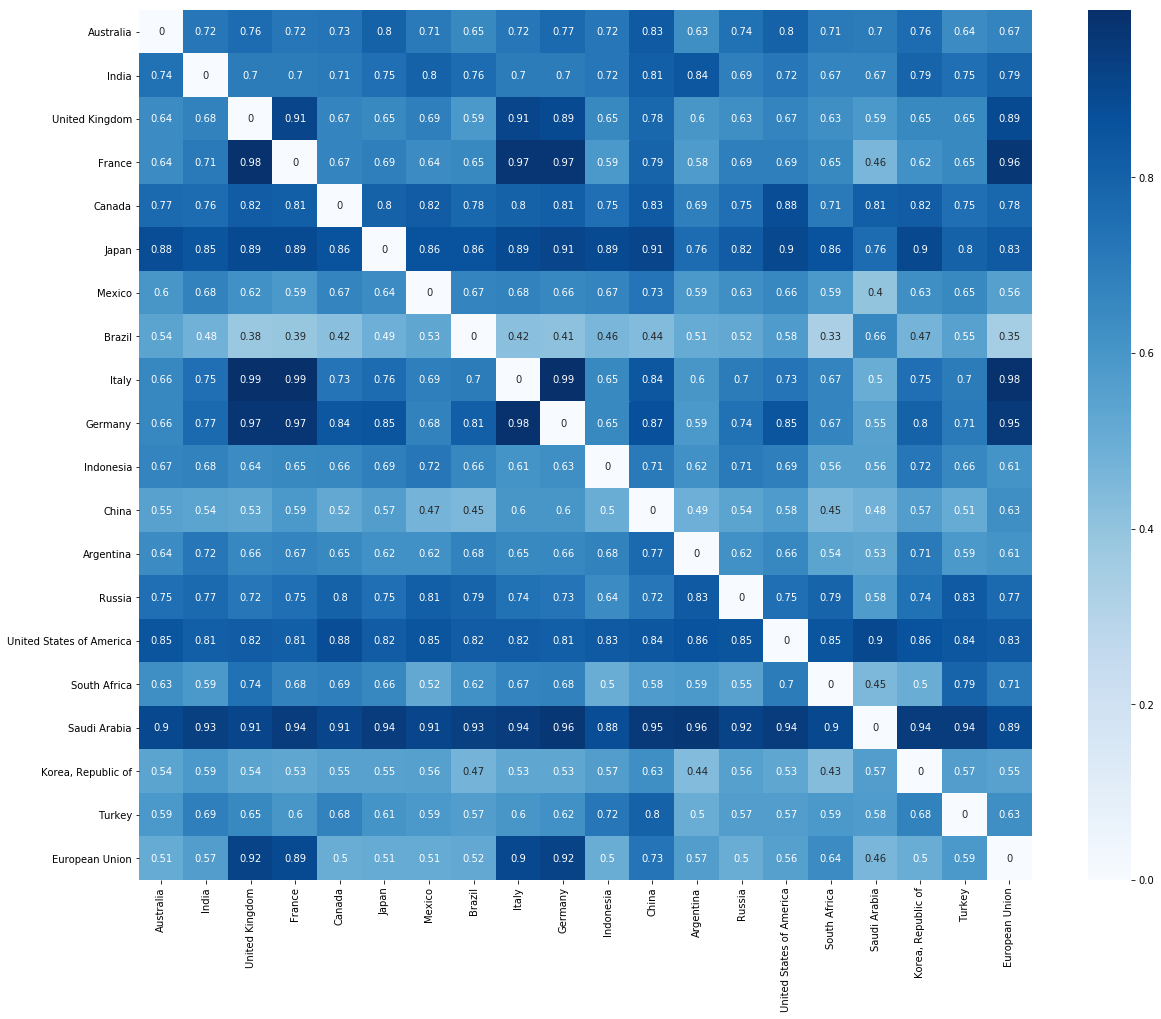

In [16]:
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(matrix_df, annot=True, annot_kws={"size": 10}, cmap="Blues")
ax.set_ylim(len(matrix_df), 0)
plt.show()

## Post 2015

In [19]:
gDG_post2015 = gDF[gDF['Inception Date'] > '1/1/2015']

In [20]:
for i in g20_list_new:
    for j in g20_list_new:
        if i != j:
            matrix_df.loc[i, j] = round(get_perp(i, j, gDG_post2015),2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


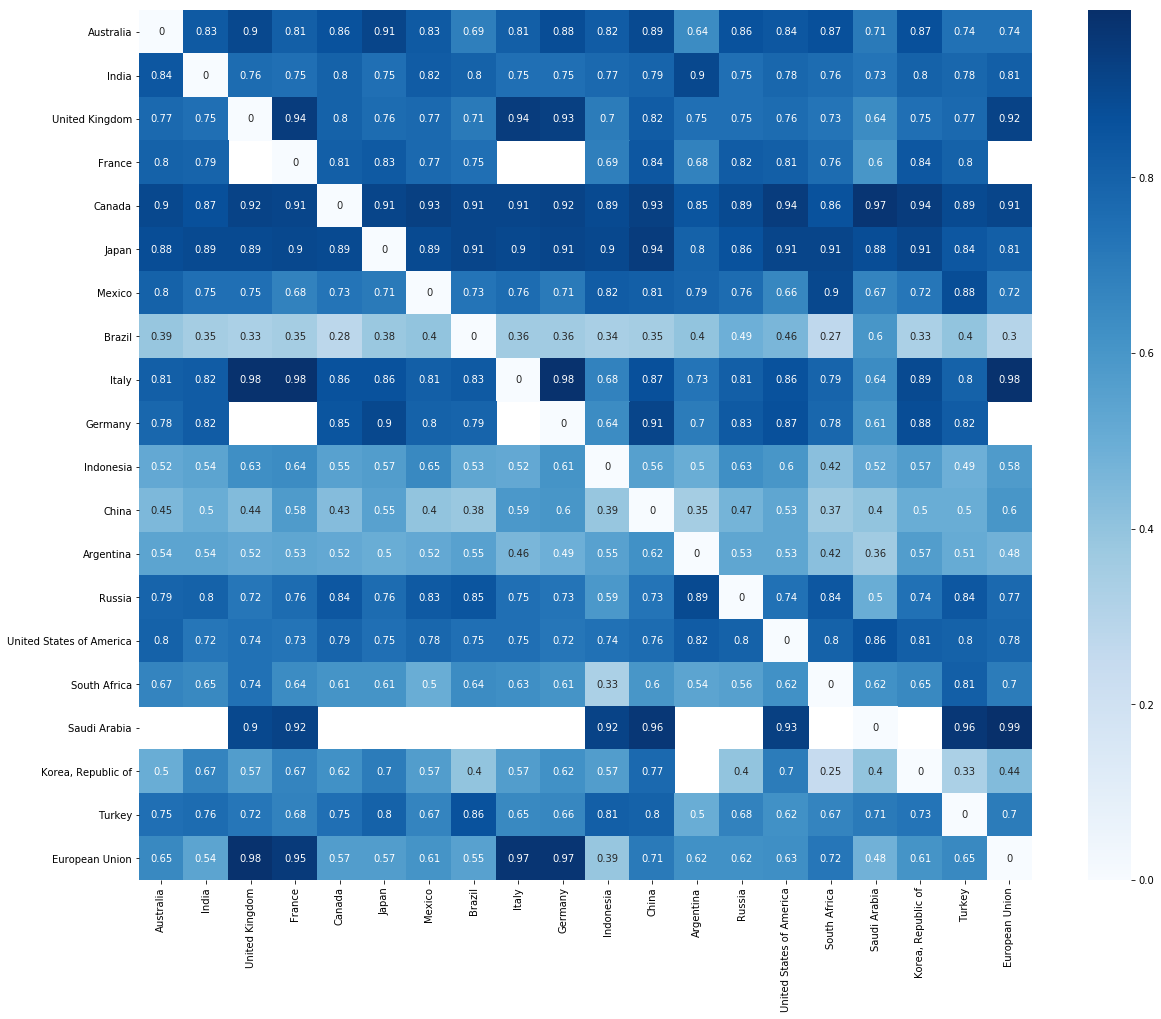

In [21]:
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(matrix_df, annot=True, annot_kws={"size": 10}, cmap="Blues")
ax.set_ylim(len(matrix_df), 0)
plt.show()

## Through 2012

In [22]:
gDF_pre2013 = gDF[gDF['Inception Date'] < '1/1/2013']

In [23]:
for i in g20_list_new:
    for j in g20_list_new:
        if i != j:
            matrix_df.loc[i, j] = round(get_perp(i, j, gDF_pre2013),2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


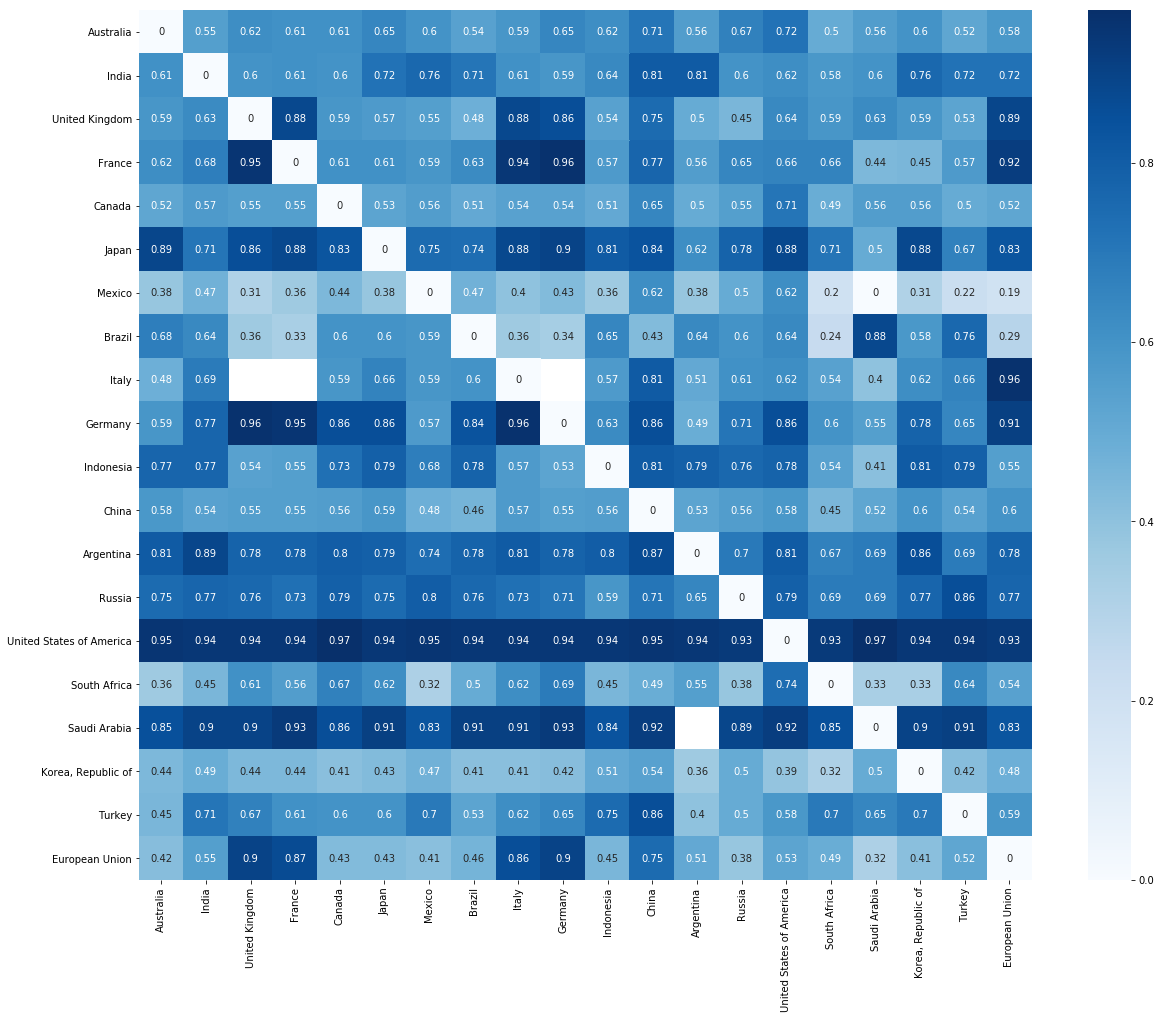

In [24]:
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(matrix_df, annot=True, annot_kws={"size": 10}, cmap="Blues")
ax.set_ylim(len(matrix_df), 0)
plt.show()

## Map

In [27]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [28]:
df_trade['Intervention_ID'] = df_trade['Intervention ID']

In [29]:
world["name"].replace({"W. Sahara": "Western Sahara",
                                'Dem. Rep. Congo':'Congo, The Democratic Republic of the',
                                 'Dominican Rep.':'Dominican Republic',
                                 'Falkland Is.':'Falkland Islands (Malvinas)',
                                 'Fr. S. Antarctic Lands':'Antarctica',
                                 'Central African Rep.': 'Central African Republic',
                                 'Eq. Guinea':'Equatorial Guinea',
                                 'eSwatini': 'Eswatini',
                                 'Solomon Is.': 'Solomon Islands',
                                 'N. Cyprus': 'Cyprus',
                                 'Bosnia and Herz.':'Bosnia and Herzegovina',
                                 'S. Sudan': 'South Sudan', 'Sudan': 'Republic of the Sudan	'
                                }, inplace=True)

In [31]:
drop_gta_df = df_trade.dropna(subset=['GTA_Evaluation'])
yr_df = drop_gta_df[drop_gta_df['GTA_Evaluation'] == "Green"]

In [33]:
percent_green = pd.DataFrame(yr_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count() / drop_gta_df.groupby(["Implementing Jurisdiction"]).Intervention_ID.count())
percent_green['percent_discriminatory'] = 1 - percent_green['Intervention_ID']
percent_green = percent_green.reset_index()

In [35]:
percent_green_minus = percent_green[percent_green['Implementing Jurisdiction'].isin(world['name'])].sort_values(
    by='Implementing Jurisdiction', ascending=True)

world_minus = world[world['name'].isin(percent_green['Implementing Jurisdiction'])].sort_values(
    by='name', ascending=True)

In [37]:
percent_green_minus['name'] = percent_green_minus['Implementing Jurisdiction']

In [38]:
world_merge = pd.merge(world, percent_green_minus, on='name', how='inner')

//anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


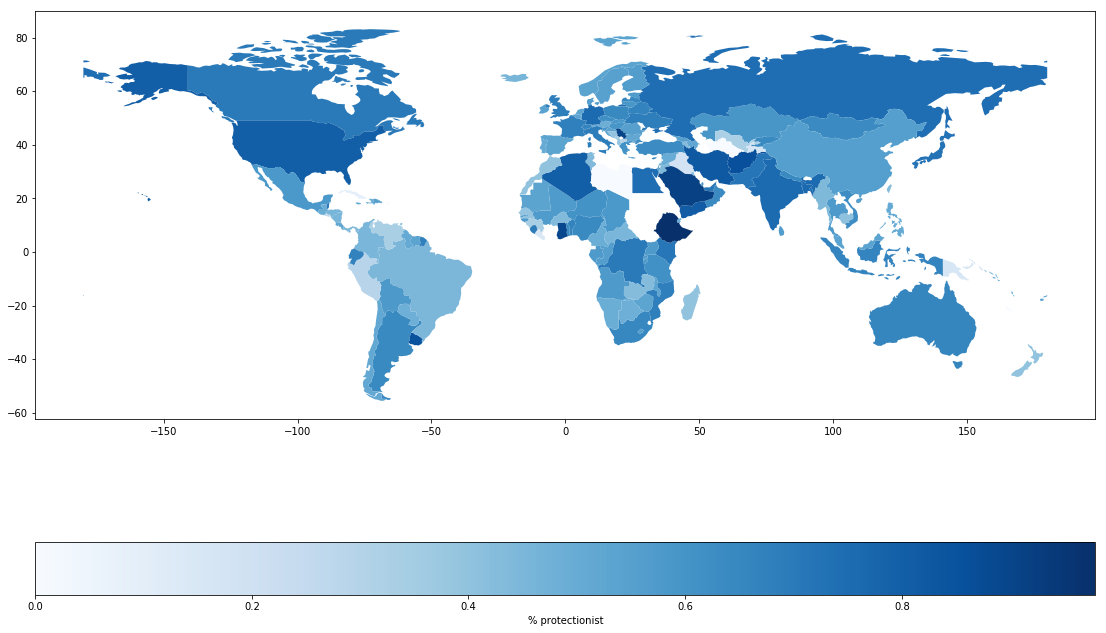

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(19, 15))
world_merge.plot(column='percent_discriminatory', 
                 ax=ax, legend=True, cmap='Blues',
                legend_kwds={'label': "% protectionist",'orientation': "horizontal"})
plt.show()




Sudan not fixed

## Machine Learning

### Classifier

In [58]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [59]:
gDF_dropped = gDF.dropna(subset=['Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list', 
                                "GTA_Evaluation"])

In [60]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction']
features.extend(sector_string_list)

In [ ]:
y_train_ship = gDF_dropped["GTA_Evaluation"]

X_train_ship = gDF_dropped[features].to_dict(orient="records") 

#categorize the data
vec = DictVectorizer(sparse=False)
vec.fit(X_train_ship)
X_train_ship = vec.transform(X_train_ship)

# standardize the data
scaler = StandardScaler()
scaler.fit(X_train_ship)
X_train_sc_ship = scaler.transform(X_train_ship)

# fit the 5-nearest neighbors model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_sc_ship, y_train_ship)

y_train_pred_ship = model.predict(X_train_sc_ship)

In [ ]:
accuracy_score(y_train_ship, y_train_pred_ship)

### Regressor

In [ ]:
df_regress = gDF.dropna(subset=['Implementing Jurisdiction', 'Affected Jurisdiction', 'sector_list', 
                                "GTA_Evaluation"])

df_regress = df_regress.dropna(subset=features)
df_regress = df_regress.dropna(subset=['Inception Date', 'Removal Date'])

df_regress['days'] = df_regress['Removal Date'] - df_regress['Inception Date']
df_regress['days'] = df_regress['days'].dt.total_seconds() / (24.0 * 60.0 * 60.0)

In [ ]:
features = ['Implementing Jurisdiction', 'Affected Jurisdiction', 'GTA_Evaluation']
features.extend(sector_string_list)

In [ ]:
X_train_dict_g20 = df_regress[features].to_dict(orient="records")
y_train_g20 = df_regress["days"]


vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict_g20)
X_train_g20 = vec.transform(X_train_dict_g20)

scaler = StandardScaler()
scaler.fit(X_train_g20)
X_train_sc_g20 = scaler.transform(X_train_g20)

from sklearn.neighbors import KNeighborsRegressor

# Fit a 10-nearest neighbors model.
model_g20 = KNeighborsRegressor(n_neighbors=15)
model_g20.fit(X_train_sc_g20, y_train_g20)

# Calculate the model predictions on the training data.
y_train_pred_g20 = model_g20.predict(X_train_sc_g20)
y_train_pred_g20

In [ ]:
mse_g20 = ((y_train_g20 - y_train_pred_g20) ** 2).mean()
rmse_g20 = np.sqrt(mse_g20)
rmse_g20